<a href="https://colab.research.google.com/github/mtodisco10/fastaiProjects/blob/master/architecture_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classifying Architecture Styles from Building Images with fast.ai

Using fast.ai the below model was trained on images of buildings in 4 categories:
- Classical
- Gothic
- Modern
- Victorian

The result is a predictive model that given an image can classify the images as one of the 4 architecture styles.

It's important to note that this code was based off the course from 2019.  A newer version was recently released in 2020.

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
from fastai.vision import *
from fastai.metrics import error_rate

In [ ]:
# Downloading pics to their own folders
path = Path('architecture/buildings')
def download_pics(category_lst):
  for f in category_lst:
    print(f'Downloading {f} images')
    folder = f
    file = f + '.csv'
    dest = path/folder
    dest.mkdir(parents=True, exist_ok=True)
    download_images(file, dest, max_pics=200)

category_lst = ['classical','gothic','modern','victorian']
download_pics(category_lst)

In [ ]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

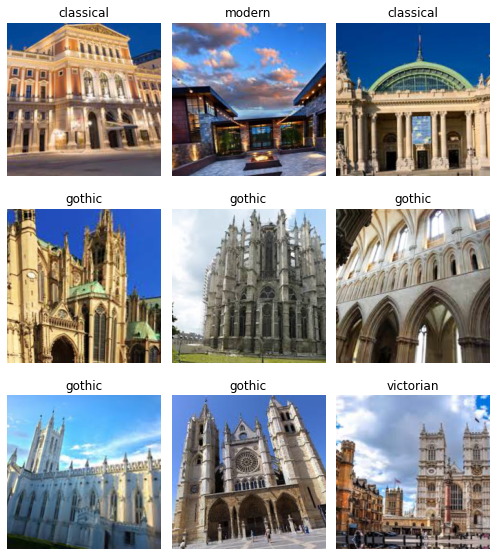

In [ ]:
data.show_batch(rows=3, figsize=(7,8))

In [ ]:
classes = ['classical', 'gothic', 'modern', 'victorian']
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

classical


gothic


modern


victorian


# Train the Model

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.064721,1.343247,0.590361,00:05
1,1.341177,0.917748,0.265060,00:04
2,1.032467,0.894597,0.228916,00:04
3,0.865289,0.892605,0.228916,00:04


In [ ]:
learn.save('stage-1')

In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(6, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.461454,0.833316,0.228916,00:04
1,0.402217,0.771987,0.265060,00:04
2,0.334353,0.773460,0.216867,00:04
3,0.303135,0.742748,0.192771,00:04
4,0.253712,0.732861,0.204819,00:04
5,0.230066,0.721605,0.204819,00:04


In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

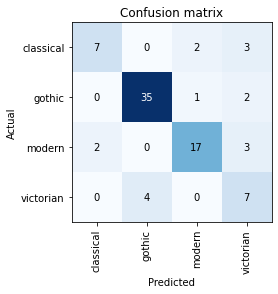

In [ ]:
interp.plot_confusion_matrix()

In [ ]:
print('This isn\'t too shabby for a first try')
learn.save('stage-2')

This isn't too shabby for a first try


Cleaning the Data

In [ ]:
from fastai.widgets import *
db = (ImageList.from_folder(path)
.split_none()
.label_from_folder()
.transform(get_transforms(), size=224)
.databunch())
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)
learn_cln.load('stage-2');

In [ ]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

### Deploying the Model

In [ ]:
learn.export()

In [ ]:
defaults.device = torch.device('cpu')

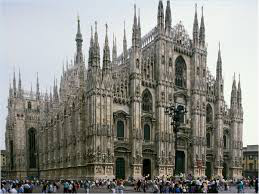

In [ ]:
img = open_image(path/'gothic'/'00000000.jpg')
img

In [ ]:
learn = load_learner(path)

In [ ]:
pred_class, pred_idx, outputs = learn.predict(img)
pred_class.obj

'gothic'

# Deployment
The model was deployed with [Render](https://render.com/).

Visit https://classifying-building-architecture.onrender.com/ and upload a building picture to have the model predict one of the four architecture styles